## XAMS SiPM simulation## 

In [1]:
#
# import the SiPM classes
#
from SiPM import *
# for plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Define general geometry parameters ###

In [2]:
# z position of the in-plane SiPMs
z_plane = 10
# radius of the cyinder for SiPMs at the side
r_cylinder = 22
# radius of a SiPM - I assume circular SiPMs with a radius to make the area correspond to a 3x3mm2 square.
r_sipm = 1.6925
# build geometry
geo = GeoParameters(z_plane=z_plane, r_cylinder=r_cylinder, r_sipm=r_sipm)

### Define the geometry of the silicon PMs ###

In [3]:
# generate a XAMS geometry with SiPMs in plane above the LXe

# center SiPMs
sipm = SiPM(type="plane",position=[0,4,z_plane],qeff=0.25)
geo.add_sipm(sipm)
sipm = SiPM(type="plane",position=[0,-4,z_plane],qeff=0.25)
geo.add_sipm(sipm)

# ring SiPMs
n_circ = 6
r = 17.5
for phi in np.linspace(0,2*np.pi,n_circ,endpoint=False):
    sipm = SiPM(type="plane",position=[r*np.cos(phi),r*np.sin(phi),z_plane],qeff=0.25)
    geo.add_sipm(sipm)

### Simulate the SiPM acceptance ###

* uv_position is the position where the UV photons are generated
* n_mc is the number of MC photons

In [4]:
n_mc = 100000
sims = []

for x in np.linspace(0,20,11,endpoint=True):
    print("simulate @ x= ",x," mm")
    sim = Simulator(geo=geo,uv_position=[x,0,0],n_mc=n_mc)
    sim.generate_events()
    sims.append(sim)

simulate @ x=  0.0  mm
generated  0  events
Number of SiPMs =  8  Generated hits from x= [0. 0. 0.]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00143  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00140  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00021  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0) p(hit) = 0.00020  qe = 0.250
 4  (x,y,z) = (-8.7, 15.2, 10.0) p(hit) = 0.00024  qe = 0.250
 5  (x,y,z) = (-17.5,  0.0, 10.0) p(hit) = 0.00020  qe = 0.250
 6  (x,y,z) = (-8.8, -15.2, 10.0) p(hit) = 0.00020  qe = 0.250
 7  (x,y,z) = ( 8.7, -15.2, 10.0) p(hit) = 0.00018  qe = 0.250
event generation done
simulate @ x=  2.0  mm
generated  0  events
Number of SiPMs =  8  Generated hits from x= [2. 0. 0.]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00137  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00132  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00033  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0) p(hit) = 0.00021  qe = 0.250
 4  (x,y,z) = (-8.7, 15.2, 10.0

### Emulate events and reconstruct the position ###

* n_event = number of events to emulate
* n_uv = number of UV photons assumed for the S2 signal

In [5]:
recs = []
for sim in sims:
    rec = Reconstruction(sim=sim)
    rec.emulate_events(n_uv=50000,n_event=1000,method="CHI2",plot=False,nbins=100,range=((-30,30),(-30,30)))
    recs.append(rec)

generated  0  events
generated  100  events
generated  200  events
generated  300  events
generated  400  events
generated  500  events
generated  600  events
generated  700  events
generated  800  events
generated  900  events
reconstruction done
generated  0  events
generated  100  events
generated  200  events
generated  300  events
generated  400  events
generated  500  events
generated  600  events
generated  700  events
generated  800  events
generated  900  events
reconstruction done
generated  0  events
generated  100  events
generated  200  events
generated  300  events
generated  400  events
generated  500  events
generated  600  events
generated  700  events
generated  800  events
generated  900  events
reconstruction done
generated  0  events
generated  100  events
generated  200  events
generated  300  events
generated  400  events
generated  500  events
generated  600  events
generated  700  events
generated  800  events
generated  900  events
reconstruction done
generate

# Plots from here ...... #

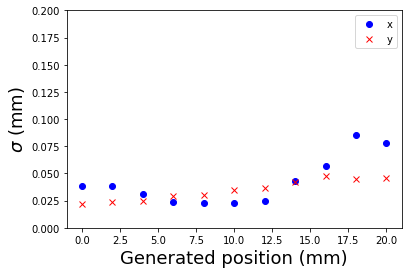

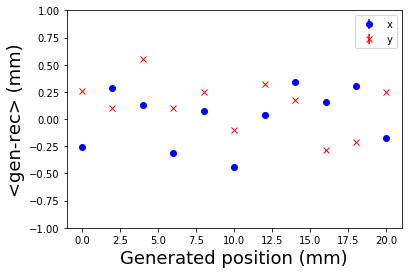

In [6]:
sx = []
sy = []
x0 = []
y0 = []
dx = []
dy = []
dx_err = []
dy_err = []


# loop through all the simulated locations
for reco in recs:
    df = reco.df_rec[reco.df_rec.status == 1]
    #print('xr =',df.xr.mean(),' yr =',df.yr.mean())
    dx.append(df.xr.mean()-reco.sim.get_x0()[0])
    dy.append(df.yr.mean()-reco.sim.get_x0()[1])

    sx.append(df.xr.sem())
    sy.append(df.yr.sem())
    x0.append(reco.sim.get_x0()[0])
    y0.append(reco.sim.get_x0()[1])

# reconstruction resolution
dx_err = np.array(sx)/np.sqrt(50000)
dy_err = np.array(sy)/np.sqrt(50000)



plt.plot(x0,sx,'bo')
plt.plot(x0,sy,'rx')
plt.ylim([0.0,+0.2])
plt.xlabel('Generated position (mm)',fontsize=18)
plt.ylabel('$\sigma$ (mm)',fontsize=18)
plt.legend(['x','y'])
plt.show()

# reconstruction bias
plt.errorbar(x0,dx,fmt='bo',yerr=dx_err)
plt.errorbar(x0,dy,fmt='rx',yerr=dy_err)
plt.ylim([-1.0,+1.0])
plt.xlabel('Generated position (mm)',fontsize=18)
plt.ylabel('<gen-rec> (mm)',fontsize=18)
plt.legend(['x','y'])
plt.show()


[4. 0. 0.]
<xr> =  19.82633844887775  +/- 0.07810038928476092  mm
    rms_x =  2.469751162856533  mm
<yr> =  0.24589769268590744  +/- 0.04624052175794359  mm
    rms_y =  1.4622536894967488  mm


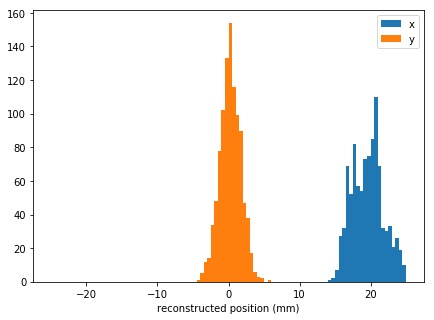

In [13]:
rec = recs[2]

i=10
print(rec.sim.get_x0())
recs[i].plot(type="res",bins=100,range=(-25,25))

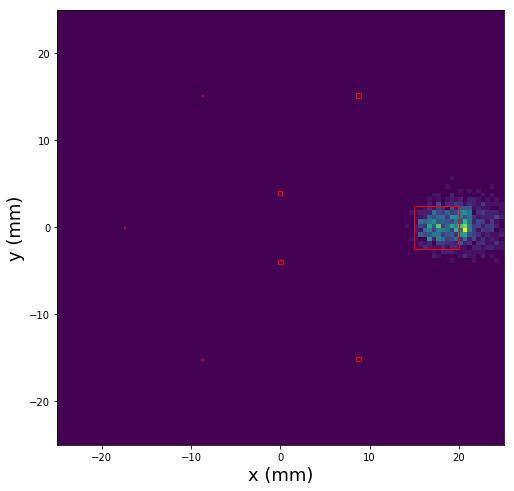

In [8]:
i=10
ax = recs[i].plot(type="xy",range=((-25,25),(-25,25)))

 N(UV) reco =  53272.35465517358  +/- 423.2346855815975


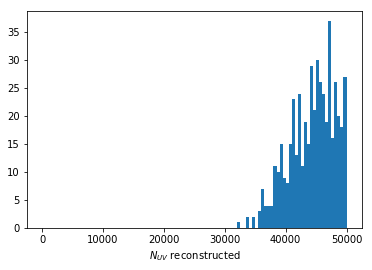

In [9]:
recs[i].plot(type="intensity",range=(0,50000))

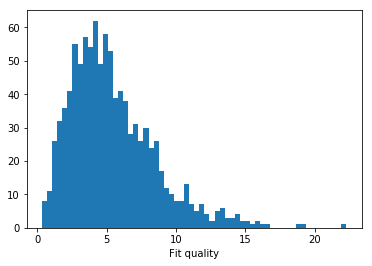

In [10]:
recs[i].plot(type="fit_quality",bins=60)

In [11]:
df = df.replace([np.inf, -np.inf], np.nan).dropna()

(0, 30)

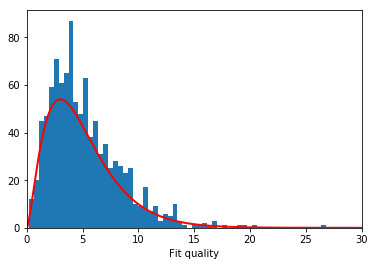

In [12]:
import scipy.stats as stats
# Plot the theoretical density of f
x = np.arange(0, 50, .05)
plt.plot(x, 350*stats.chi2.pdf(x, df=5), color='r', lw=2)
#h=plt.hist(df['chi2'],bins=50)
rec.plot(type="fit_quality",bins=60)
plt.xlim([0,30])